<h1>Natural Language Processing/ Artificial Intelligence <br> Coding Problem</h1>

In [44]:
import os.path
import sys

try:
    import apiai
except ImportError:
    sys.path.append(
        os.path.join(os.path.dirname(os.path.realpath(__file__)), os.pardir)
    )
    import apiai
    
import json

In [45]:
import nltk 
from nltk import word_tokenize
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk import wordpunct_tokenize
from itertools import chain
from langdetect import detect
stop = set(stopwords.words('english'))

<h4>Problem Statement 1: Tagging and tokenization</h4>

<p>Write a program in python to: <br>
Read a text file, split the input text content into sentences and then and for sentence print the
following features. <br>
1. All the nouns in the Sentence. <br>
2. All the verbs in the sentence. <br>
3. All the stop words that appear in the sentence <br>
4. All the adjectives in the sentence <br>
5. All the adverbs in the sentence <br>
6. All the synonyms for every adjective of the sentence. <br>
7. Antonym of every adjective in the sentence.</p>

########################################

In [46]:
# extracting synontms and antonyms from given char using synonyms_Antonym function
def read_adj(adj):
    data = dict()
    for i in range(len(adj)):
        sys, anto = synonyms_Antonym(adj[i]) # synonyms_Antonym function to extract
        data[adj[i]] = {     # dict
            "synonyms": sys,
            "antonym": anto
        }
        
    return data

In [47]:
# function to extract synonyms & antonyms from adjectives
def synonyms_Antonym(adj):
    synonyms = []
    antonyms = []
    for syn in wordnet.synsets(adj):
        for l in syn.lemmas():
            synonyms.append(l.name())
            if l.antonyms():
                antonyms.append(l.antonyms()[0].name())
                
    return [str(y) for _,y in enumerate(set(synonyms))][:6], [str(y) for _,y in enumerate(set(antonyms))][:5]

In [48]:
# Extracting stop words from sentences
def stop_words(sentence):
    stop = set(stopwords.words('english')) # english stop words in list
    return list(set([i for i in sentence.lower().split() if i in stop]))

In [49]:
# extracting noun, verbs, adverbs, adjectives etc from text and return in to a dict 
def tagging_tok(TEXT):
    text = word_tokenize(TEXT)
    pos_tag = nltk.pos_tag(text)
    #print pos_tag
    nouns = [pos_tag[i][0] for i in range(len(pos_tag)) if 'NN' in pos_tag[i][1]] #nouns
    verbs = [pos_tag[i][0] for i in range(len(pos_tag)) if 'VB' in pos_tag[i][1]] # verbs
    adjectives = [pos_tag[i][0] for i in range(len(pos_tag)) if 'JJ' in pos_tag[i][1]] #adjectives
    adverbs = [pos_tag[i][0] for i in range(len(pos_tag)) if 'RB' in pos_tag[i][1]]  #adverbs
    
    data = {
        'noun': nouns,
        'verbs': verbs,
        'adjectives': adjectives,
        'adverbs': adverbs,
        'synoms_antoms': read_adj(adjectives),
        'stop_words': stop_words(TEXT)
    }
    
    return data

In [50]:
# printing out synonyms & antonyms 
def print_sy_an(adjectives, data):
    sys = data['synoms_antoms'][adjectives]['synonyms']
    ant = data['synoms_antoms'][adjectives]['antonym']
    print "Synonyms: word("+str(adjectives)+") : " +" , ".join([sys[i] for i in range(len(sys))])
    print "Antonyms: word("+str(adjectives)+") : " +" , ".join([ant[i] for i in range(len(ant))])

In [52]:
# printing out all in prerequisite format
def print_(sent):
    data = tagging_tok(TEXT=sent)
    print "Nouns: "+ " , ".join([data['noun'][i] for i in range(len(data['noun']))])
    print "Verbs: "+ " , ".join([data['verbs'][i] for i in range(len(data['verbs']))])
    print "Stop-words: "+ " , ".join([data['stop_words'][i] for i in range(len(data['stop_words']))])
    print "Adjectives: "+ " , ".join([data['adjectives'][i] for i in range(len(data['adjectives']))])
    print "Adverbs: "+ " , ".join([data['adverbs'][i] for i in range(len(data['adverbs']))])
    [print_sy_an(data['adjectives'][i], data) for i in range(len(data['adjectives']))]

### Example 1

<p>The Minister found herself in an happy situation when the House unprecedentedly voted her to continue to be in power.</p>

In [64]:
TEXT = 'The Minister found herself in an happy situation when the House unprecedentedly voted her to continue to be in power.'

In [54]:
print_(TEXT)

Nouns: Minister , situation , House , power
Verbs: found , voted , continue , be
Stop-words: be , her , when , an , to , in , the , herself
Adjectives: happy
Adverbs: when , unprecedentedly
Synonyms: word(happy) : felicitous , well-chosen , glad , happy
Antonyms: word(happy) : unhappy


### Example 2

<p>When I think about what you are doing, I wonder if you realize the effect you are having on me. It hurts. A lot.</p>

In [55]:
TEXT2 = "When I think about what you are doing, I wonder if you realize the effect you are having on me. It hurts. A lot."

In [56]:
print_(TEXT2)

Nouns: effect , lot
Verbs: think , are , doing , wonder , realize , are , having , hurts
Stop-words: a , on , about , i , when , what , having , are , it , you , the , if
Adjectives: 
Adverbs: When


### Example 3

<p>The woman is a feisty one but her daughter is such a beauty I'm obliged to keep mommy alive for at least a short time until we are locked in the privacy of my refuge.</p>

In [58]:
TEXT3 = "The woman is a feisty one but her daughter is such a beauty I'm obliged to keep mommy alive for at least a short time until we are locked in the privacy of my refuge."

In [59]:
print_(TEXT3)

Nouns: woman , daughter , beauty , mommy , time , privacy , refuge
Verbs: is , is , 'm , obliged , keep , are , locked
Stop-words: a , we , for , her , of , is , but , to , at , in , such , the , my , until , are
Adjectives: feisty , such , alive , least , short
Adverbs: 
Synonyms: word(feisty) : touchy , spunky , feisty , huffy , thin-skinned , plucky
Antonyms: word(feisty) : 
Synonyms: word(such) : such
Antonyms: word(such) : 
Synonyms: word(alive) : alive , alert , live , awake , active , animated
Antonyms: word(alive) : unanimated , dead
Synonyms: word(least) : least , to_the_lowest_degree
Antonyms: word(least) : most
Synonyms: word(short) : curt , curtly , suddenly , inadequate , dead , unretentive
Antonyms: word(short) : tall , long , retentive


### Example 4

<p>Mr. Thomas Morley was admitted with a gunshot wound to his leg, sustained, according to him, when he was mugged in an alley while taking a short cut to his car.</p>

In [60]:
TEXT4 = "Mr. Thomas Morley was admitted with a gunshot wound to his leg, sustained, according to him, when he was mugged in an alley while taking a short cut to his car."

In [61]:
print_(TEXT4)

Nouns: Mr. , Thomas , Morley , gunshot , wound , leg , alley , cut , car
Verbs: was , admitted , sustained , according , was , mugged , taking
Stop-words: a , his , was , when , an , to , while , in , with , he
Adjectives: short
Adverbs: when
Synonyms: word(short) : curt , curtly , suddenly , inadequate , dead , unretentive
Antonyms: word(short) : tall , long , retentive


### Example 5

<p>At the end of the day, you are solely responsible for your success and your failure. And the sooner you realize that, you accept that, and integrate that into your work ethic, you will start being successful. As long as you blame others for the reason you aren't where you want to be, you will always be a failure.</p>

In [62]:
TEXT5 = "At the end of the day, you are solely responsible for your success and your failure. And the sooner you realize that, you accept that, and integrate that into your work ethic, you will start being successful. As long as you blame others for the reason you aren't where you want to be, you will always be a failure."

In [65]:
print_(TEXT5)

Nouns: end , day , success , failure , sooner , work , others , reason , failure
Verbs: are , realize , accept , integrate , start , being , blame , are , want , be , be
Stop-words: and , be , for , that , being , of , into , your , will , to , as , are , a , the , where , you , at
Adjectives: responsible , successful
Adverbs: solely , ethic , As , long , n't , where , always
Synonyms: word(responsible) : creditworthy , responsible , responsible_for
Antonyms: word(responsible) : irresponsible
Synonyms: word(successful) : successful
Antonyms: word(successful) : unsuccessful


###################################################################################################################

<h3>Intent & Entitiie</h3>

#### 8. All the entities in the sentence.
#### 9. Find the intent of the sentence – ( Propose a technique to find the intent of the statement, and give reasoning for and against your technique proposed)



<p>(Ex: “I would like to work for Fragma Data Systems” : Here the intent of the
sentence is ‘To work for’, the entity that the intent is aimed at is ‘Fragma Data
Systems’ and the Subject of the intent is ‘I’)</p>

### Techniques
### 1.
### Using different intent & entities extracting UX platforms. example - api.ai, wit.ai, etc.(Given problem is done by using API.ai)

### 2.
### We can also use different libraries like mitie, spacy, chatterbot etc in which we will train model to extract specific entities from an intent.(no UX have to do with hardcoding it)


### 3. 
### Using Glove(global vectors for words)

### Intent and entities extraction using API.ai

In [3]:
# client access token from api.ai console
CLIENT_ACCESS_TOKEN = 'f72639ee55444ec0b0c65c30b1926b8b'

In [67]:
# function to extract intent, company , subject from sentence.
def intent_entity(access_token, text):
    ai = apiai.ApiAI(access_token) # api.ai client
    request = ai.text_request() # requesting
    request.lang = 'en' # language english
    request.session_id = "0000000000000000" # random session_id
    request.query = text # user specified text
    response = json.loads(request.getresponse().read()) # loading into json
    data = { # fetching intent , company, subject 
        "intent": response['result']['metadata']['intentName'],
        "company": response['result']['parameters']['company'],
        "subject": response['result']['parameters']['subject']
    }
    
    return data

In [ ]:
# first we have to train model using api.ai UX platform.


In [68]:
job_text = "I would like to work for Fragma Data Systems"

In [74]:
intent_entity(CLIENT_ACCESS_TOKEN, job_text)

{'company': u' Fragma Data Systems', 'intent': u'work_for', 'subject': u'I'}

In [70]:
job_text1 = "Ravi want to work for Google"

In [75]:
intent_entity(CLIENT_ACCESS_TOKEN, job_text1)

{'company': u'Google', 'intent': u'work_for', 'subject': u'ravi'}

In [76]:
job_text2 = "i want to work for Microsoft"

In [77]:
intent_entity(CLIENT_ACCESS_TOKEN, job_text2)

{'company': u'microsoft', 'intent': u'work_for', 'subject': u'I'}

In [78]:
job_text3 = "Sam would like to work for Fragma Data Systems"

In [79]:
intent_entity(CLIENT_ACCESS_TOKEN, job_text3)

{'company': u' Fragma Data Systems', 'intent': u'work_for', 'subject': u'sam'}

In [80]:
 job_text4 = "I would like to work for TCS"

In [81]:
intent_entity(CLIENT_ACCESS_TOKEN, job_text4)

{'company': u'TCS', 'intent': u'work_for', 'subject': u'I'}

# Problem Statement 2: Text analytics and Language Detection


<p>Given a snippet of text in English, French, German, or Spanish, out put the following : <br>
1. Output a Histogram of the frequency of each stop word. <br>
2. Detect the snippet's language and print the language name. You may build an offline
model for this. <br>
The snippet may contain one or more lines.</p>

In [ ]:
# library to detect language 

In [83]:
from langdetect import detect

In [84]:
detect('Output a Histogram of the frequency of each stop word. ')

u'en'

In [30]:
detect("Hamburg die Zusammenfassung aller drei Teile")


u'de'

In [ ]:
# above library is good for small sentences .

#### german text

In [92]:
g_text = '''Hamburg - Der Weltklimarat (IPCC) hat in Kopenhagen eine Debatte über die Zusammenfassung aller drei Teile
seines neuen großen Klimaberichts begonnen. Bis zum Freitag ringen Wissenschaftler und Regierungsvertreter um
den Wortlaut wichtiger Kernaussagen des sogenannten Synthesis-Report, den Uno-Generalsekretär Ban Ki Moon
und IPCC-Chef Rajendra Pachauri am Sonntag präsentieren wollen. Die drei einzelnen Teile des Reports hatte das
Gremium im September 2013 sowie im März und April 2014 vorgestellt. Die neue Zusammenfassung solle ein
Fahrplan für politische Entscheidungsträger sein, anhand derer sie den Weg zu einem globalen Abkommen zum
Klimaschutz finden könnten, sagte Pachauri am Montag zum Auftakt der Diskussionen in der dänischen Hauptstadt.'''

#### spanish text

In [93]:
spanish_text = '''Érase una vez que había una mamá cerda que tenía tres cerditos. Ella los amaba mucho, pero no había suficiente comida para alimentarlos, así que los cerditos tuvieron que ir a buscar su suerte.El primer cerdito decidió ir al sur. Encontró a un granjero en el camino que estaba llevando un atado de paja. El cerdito preguntó respetuosamente: "¿Podría por favor darme esa paja, para que yo pueda construir una casa?'''

##### English text

In [94]:
text = '''The very first lesson that should be taught to us when are old enough to understand it, is that complete
freedom from the obligation to work is unnatural, and ought to be illegal, as we can escape our share of
the burden of work only by throwing it on someone elses shoulders. Nature ordains that humans shall
perish of famine if it stops working. We cannot escape from this tyranny. The question we must settle is
how much leisure we can afford to allow ourselves.'''

#### french text

In [95]:
french_text = '''Il était une fois une maman cochon qui avait trois petits cochons. Elle les aimait beaucoup, mais comme il n'y avait pas assez de nourriture pour qu'ils puissent tous manger à leur faim, elle les a envoyé tenter leur chance dans le vaste monde.
Le premier petit cochon a décidé d'aller vers le Sud. Alors qu'il marchait le long de la route, il a rencontré un fermier qui portait une botte de paille. Il lui a alors demandé poliment : "Pourriez-vous s'il vous plaît me donner cette paille, que je puisse construire une maison?'''

In [96]:
# function to plot stop words histogram
def plot_stop_freq_plot(text, language):
    stop = set(stopwords.words(language))
    words = wordpunct_tokenize(text)
    stop_words = [words[i].lower() for i in range(len(words)) if words[i].lower() in stop]
    dic = nltk.FreqDist(stop_words)
    print "Stop words Histrogram"
    dic.plot(50, cumulative=False)

### This function detect language

In [97]:
# use stopwords for different laguages to detect the language
def language_detect(text):
    lang_ratios = {} # store scores for languages
    tokens = wordpunct_tokenize(text) # tokeniziing sentence
    words = [word.lower() for word in tokens] # changing to lower case
    
    for language in stopwords.fileids(): # languages present in stopwords 
        stopwords_set = set(stopwords.words(language)) # stopwords list for each language
        words_set = set(words) # unique
        common_elements = words_set.intersection(stopwords_set) # common words between stopwords and sentence
        lang_ratios[language] = len(common_elements) # puttting scores for language
        
    return lang_ratios, max(lang_ratios, key=lang_ratios.get)

In [98]:
# function to detect language then plot stopwords histrogam. 
def historam_language_detect(text):
    _, lang = language_detect(text)
    print "Detected Language : "+str(lang)
    plot_stop_freq_plot(text, str(lang))

### Ex. 1. English

Detected Language : english
Stop words Histrogram


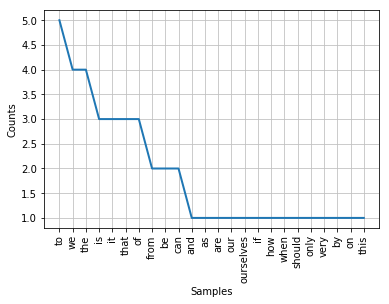

In [99]:
historam_language_detect(text)

### Ex. 2. German

Detected Language : german
Stop words Histrogram


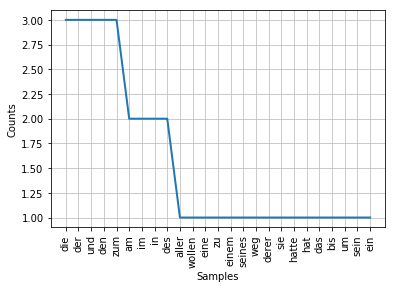

In [100]:
historam_language_detect(g_text)

### Ex. 3. Spanish

Detected Language : spanish
Stop words Histrogram


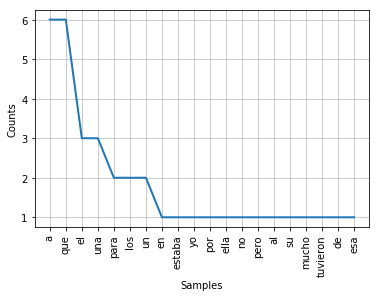

In [101]:
historam_language_detect(spanish_text)

### Ex. 4. French

Detected Language : french
Stop words Histrogram


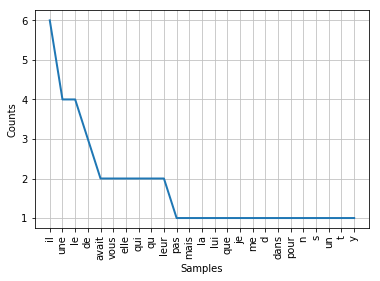

In [103]:
historam_language_detect(french_text)




## Below link is to train neural network for language detection

#### Link:
https://github.com/lukaszkm/machinelearningexp/blob/master/Deep_Learning_Language_identification.ipynb